## Importing Packages

In [569]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [570]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Toshiba hard drive data
## Records from January, 1 2017 to March, 31 2017

## Importing data into DataFrame

In [571]:
data = pd.read_csv("toshiba_2017Q1_droppednormalized.csv")

In [572]:
data.shape

(33793, 30)

In [573]:
data = data.drop(data.columns[[0]], axis = 1) 
data.sample(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
10205,2017-02-04,564ESIZ3S,TOSHIBA MQ01ABF050,500107862016,0,0.0,0.0,1325.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1611.0,0.0,0.0,248.0,0.0
24545,2017-03-13,96HCTBHRT,TOSHIBA MQ01ABF050,500107862016,0,0.0,0.0,1400.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1086.0,0.0,0.0,261.0,0.0
14301,2017-02-16,Z262A0TAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,72.0,426.0,43.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11158,2017-02-07,Z252A30AS,TOSHIBA DT01ACA300,3000592982016,0,0.0,74.0,421.0,50.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24101,2017-03-12,66GHS5NES,TOSHIBA MQ01ABF050,500107862016,0,0.0,0.0,1300.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3199.0,0.0,0.0,260.0,0.0


# Data Cleaning

## Check for Missing Values

In [574]:
missing=pd.DataFrame(data.isnull().sum())
missing

,0
date,0
serial_number,0
model,0
capacity_bytes,0
failure,0
smart_1_raw,0
smart_2_raw,0
smart_3_raw,0
smart_4_raw,0
smart_5_raw,0


## Dropping null values

In [575]:
data_dropped = data.dropna(how='any') 
print(data_dropped.shape)

(29837, 29)


In [576]:
df= data_dropped.reset_index(drop= True)
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
0,2017-01-01,45CHK11RFMYB,TOSHIBA MD04ABA400V,4000787030016,0,0.0,0.0,5319.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14214.0,0.0,0.0,373.0,0.0
1,2017-01-01,X4OHK094FMXB,TOSHIBA MD04ABA500V,5000981078016,0,0.0,0.0,6350.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16148.0,0.0,0.0,410.0,0.0
2,2017-01-01,45D7K12ZFMYB,TOSHIBA MD04ABA400V,4000787030016,0,0.0,0.0,5262.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14218.0,0.0,0.0,388.0,0.0
3,2017-01-01,45CHK11UFMYB,TOSHIBA MD04ABA400V,4000787030016,0,0.0,0.0,5229.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14242.0,0.0,0.0,376.0,0.0
4,2017-01-01,45CHK11SFMYB,TOSHIBA MD04ABA400V,4000787030016,0,0.0,0.0,5237.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14215.0,0.0,0.0,375.0,0.0


## Dropping Duplicate Values

In [577]:
data_dropped = df.drop_duplicates()
data_dropped.shape

(29837, 29)

## Number of Failed Hard-Drives

In [578]:
df.failure.value_counts()

0    29831
1        6
Name: failure, dtype: int64

#### '0' indicates 'Not Failed'
#### '1' indicates 'Failed'

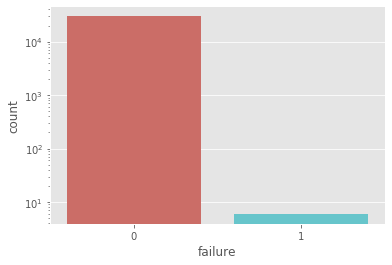

In [579]:
sns.countplot(x=df.failure,palette='hls').set_yscale("log")

#### We can observe that this data set is highly imbalanced.

## Number of Failed Hard-Drives Per Model

In [580]:
print(df.groupby('model')['failure'].sum().sort_values(ascending=False))

model
TOSHIBA MQ01ABF050     5
TOSHIBA MD04ABA400V    1
TOSHIBA MQ01ABF050M    0
TOSHIBA MD04ABA500V    0
Name: failure, dtype: int64


## Number of Failed Hard-Drives with Serial Numbers

In [581]:
serial_Number = df.groupby('serial_number')['failure'].sum().sort_values(ascending=False)
serial_Number.head(10)

serial_number
66GHS5NHS       1
66GHS5NDS       1
96HCTBI8T       1
45CHK11WFMYB    1
96ICTBQIT       1
66HLS2OPS       1
45DDK14SFMYB    0
563ESIX1S       0
563ESIWSS       0
45DGK0XNFMYB    0
Name: failure, dtype: int64

## Percentage of Hard-Drives Failed based on the Serial Number

In [582]:
# Total Number of Unique Hard-Drives
df['serial_number'].unique()

array(['45CHK11RFMYB', 'X4OHK094FMXB', '45D7K12ZFMYB', '45CHK11UFMYB',
       '45CHK11SFMYB', 'X4G2K09XFMXB', '5641SFROS', '4593K19XFMYB',
       '2511K0Q3FMYB', '66GHS5N3S', '66GHS5NKS', '84BGK00MFMYB',
       '4589K0VHFMYB', '45CHK11IFMYB', '45D7K137FMYB', '564ESIZ0S',
       '5641SFRWS', '5641SFQUS', '66GHS5NES', '5641SFQZS', '5641SFRHS',
       '66HLS2OJS', '564ESIZ8S', '45A6K0YMFMYB', '45CHK11WFMYB',
       'X4OEK0CGFMXB', 'X4A2K03RFMXB', '4589K0VIFMYB', '5641SFR4S',
       'X4A2K060FMXB', '4582K1CGFMYB', '5641SFR6S', '84BFK00MFMYB',
       '4596K0X7FMYB', 'X4OEK0CIFMXB', '5641SFRJS', 'X4A2K03PFMXB',
       'X4AGK066FMXB', '45CHK124FMYB', '564ESIZ5S', '5641SFSAS',
       '4591K0HFFMYB', '84BGK00QFMYB', '45CHK121FMYB', '45CHK11GFMYB',
       '45CAK0Q5FMYB', '45D7K135FMYB', '66GHS5MYS', '45CHK11XFMYB',
       '564ESIYUS', 'X4AGK064FMXB', '5641SFS9S', '2514K0H4FMYB',
       '4591K0GPFMYB', '5641SFRZS', '5641SFRAS', '5641SFQVS',
       '45CIK0M6FMYB', '66GHS5NFS', '4589K0VFFMYB', '564

In [583]:
data_aggregate = (df[['date','serial_number','failure']].groupby('serial_number',as_index = True)
                .agg({'date':'count', 'failure':'sum'})
                .rename(columns={'date': 'date_count', 'failure': 'failure_sum'})
                .sort_values(by=['failure_sum'],axis=0,ascending=False))
data_aggregate

,date_count,failure_sum
serial_number,,
66GHS5NDS,6,1
96ICTBQIT,6,1
66HLS2OPS,10,1
96HCTBI8T,26,1
66GHS5NHS,9,1
...,...,...
45DDK14TFMYB,86,0
45DDK14SFMYB,86,0
45DDK14QFMYB,86,0


number of disks :  480
number of failed disks:  6
percentage of broken disks:  1.25 %


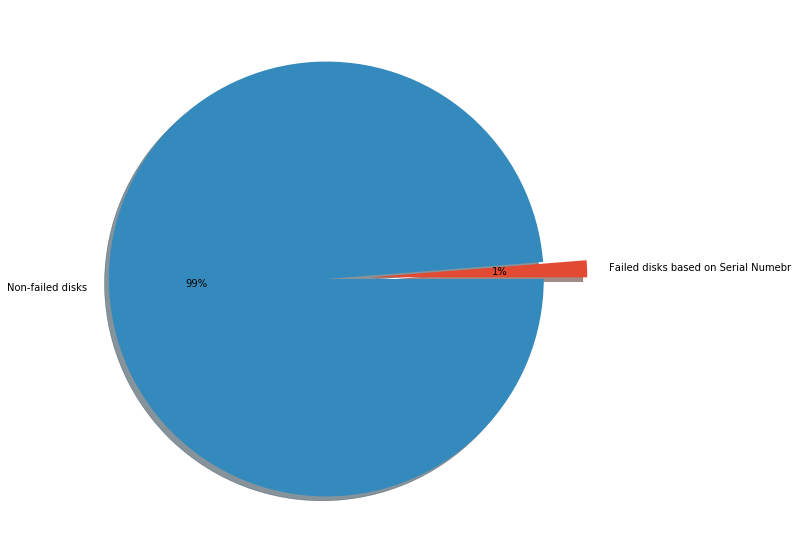

In [584]:
all_count = data_aggregate.shape[0]
broken_count = data_aggregate[data_aggregate.iloc[:, 1] >= 1].shape[0]
print ('number of disks : ',all_count)
print ('number of failed disks: ',broken_count)
print ('percentage of broken disks: ',broken_count/all_count*100,'%' )

fig = plt.figure(figsize=(10,10))
labels = ['Failed disks based on Serial Numebr','Non-failed disks']
shares = [broken_count,all_count-broken_count] 
plt.pie(shares,explode=(0.2,0),labels=labels,autopct='%.0f%%',shadow=True,)
plt.show()

## Normalization of Data

In [641]:
un_normalized = df.drop(['date', 'serial_number', 'model', 'capacity_bytes','failure'], axis=1)
un_normalized.shape

(29837, 24)

In [586]:
un_normalized = un_normalized.reset_index(drop= True)
print(un_normalized.shape)
un_normalized.head()

(29837, 24)


,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
0,0.0,0.0,5319.0,11.0,0.0,0.0,0.0,14240.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,14214.0,0.0,0.0,373.0,0.0
1,0.0,0.0,6350.0,15.0,0.0,0.0,0.0,16162.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,16148.0,0.0,0.0,410.0,0.0
2,0.0,0.0,5262.0,9.0,0.0,0.0,0.0,14242.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,14218.0,0.0,0.0,388.0,0.0
3,0.0,0.0,5229.0,3.0,0.0,0.0,0.0,14287.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,14242.0,0.0,0.0,376.0,0.0
4,0.0,0.0,5237.0,11.0,0.0,0.0,0.0,14241.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,14215.0,0.0,0.0,375.0,0.0


In [587]:
un_normalized.describe()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
count,29837.0,29837.0,29837.000000,29837.000000,29837.000000,29837.0,29837.0,29837.000000,29837.0,29837.000000,...,29837.000000,29837.000000,29837.0,29837.000000,29837.0,29837.000000,29837.0,29837.0,29837.000000,29837.0
mean,0.0,0.0,3707.918055,6.645440,7.971043,0.0,0.0,10090.559875,0.0,6.636793,...,5.063579,0.004290,0.0,0.046117,0.0,10069.034621,0.0,0.0,317.948922,0.0
std,0.0,0.0,2158.787150,5.054423,328.601059,0.0,0.0,6877.713186,0.0,5.030264,...,211.478386,0.185209,0.0,0.677540,0.0,6866.771281,0.0,0.0,59.196861,0.0
min,0.0,0.0,1291.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,239.000000,0.0
25%,0.0,0.0,1346.000000,4.000000,0.000000,0.0,0.0,2667.000000,0.0,4.000000,...,0.000000,0.000000,0.0,0.000000,0.0,2645.000000,0.0,0.0,260.000000,0.0
50%,0.0,0.0,5259.000000,5.000000,0.000000,0.0,0.0,14529.000000,0.0,5.000000,...,0.000000,0.000000,0.0,0.000000,0.0,14492.000000,0.0,0.0,293.000000,0.0
75%,0.0,0.0,5404.000000,8.000000,0.000000,0.0,0.0,16316.000000,0.0,8.000000,...,0.000000,0.000000,0.0,0.000000,0.0,16278.000000,0.0,0.0,380.000000,0.0
max,0.0,0.0,6791.000000,64.000000,16112.000000,0.0,0.0,18311.000000,0.0,64.000000,...,9111.000000,8.000000,0.0,12.000000,0.0,18286.000000,0.0,0.0,420.000000,0.0


## Normalized Dataset with MinMaxScaler()

In [588]:
mms = MinMaxScaler()
cols = un_normalized.keys()
normalized_data = pd.DataFrame(mms.fit_transform(un_normalized), columns= cols)
normalized_data.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
0,0.0,0.0,0.732364,0.158730,0.0,0.0,0.0,0.777675,0.0,0.158730,...,0.0,0.0,0.0,0.0,0.0,0.777316,0.0,0.0,0.740331,0.0
1,0.0,0.0,0.919818,0.222222,0.0,0.0,0.0,0.882639,0.0,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.883080,0.0,0.0,0.944751,0.0
2,0.0,0.0,0.722000,0.126984,0.0,0.0,0.0,0.777784,0.0,0.126984,...,0.0,0.0,0.0,0.0,0.0,0.777535,0.0,0.0,0.823204,0.0
3,0.0,0.0,0.716000,0.031746,0.0,0.0,0.0,0.780241,0.0,0.031746,...,0.0,0.0,0.0,0.0,0.0,0.778847,0.0,0.0,0.756906,0.0
4,0.0,0.0,0.717455,0.158730,0.0,0.0,0.0,0.777729,0.0,0.158730,...,0.0,0.0,0.0,0.0,0.0,0.777371,0.0,0.0,0.751381,0.0


In [589]:
normalized_data.describe()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
count,29837.0,29837.0,29837.000000,29837.000000,29837.000000,29837.0,29837.0,29837.000000,29837.0,29837.000000,...,29837.000000,29837.000000,29837.0,29837.000000,29837.0,29837.000000,29837.0,29837.0,29837.000000,29837.0
mean,0.0,0.0,0.439440,0.089610,0.000495,0.0,0.0,0.551065,0.0,0.089473,...,0.000556,0.000536,0.0,0.003843,0.0,0.550642,0.0,0.0,0.436182,0.0
std,0.0,0.0,0.392507,0.080229,0.020395,0.0,0.0,0.375606,0.0,0.079845,...,0.023211,0.023151,0.0,0.056462,0.0,0.375521,0.0,0.0,0.327054,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.010000,0.047619,0.000000,0.0,0.0,0.145650,0.0,0.047619,...,0.000000,0.000000,0.0,0.000000,0.0,0.144646,0.0,0.0,0.116022,0.0
50%,0.0,0.0,0.721455,0.063492,0.000000,0.0,0.0,0.793457,0.0,0.063492,...,0.000000,0.000000,0.0,0.000000,0.0,0.792519,0.0,0.0,0.298343,0.0
75%,0.0,0.0,0.747818,0.111111,0.000000,0.0,0.0,0.891049,0.0,0.111111,...,0.000000,0.000000,0.0,0.000000,0.0,0.890189,0.0,0.0,0.779006,0.0
max,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0


#### Since there is no significance of having smart_1_raw', 'smart_2_raw', 'smart_7_raw', 'smart_8_raw','smart_10_raw','smart_198_raw', 'smart_220_raw', 'smart_223_raw', 'smart_224_raw', 'smart_240_raw' attributes, we drop the columns.

In [590]:
normalized_data = normalized_data.drop(['smart_1_raw', 'smart_2_raw', 'smart_7_raw', 'smart_8_raw','smart_10_raw','smart_198_raw', 'smart_220_raw', 'smart_223_raw', 'smart_224_raw', 'smart_240_raw'], axis=1)


In [591]:
normalized_data["failure"] = df.failure

In [593]:
new_col = list(normalized_data.columns)
new_col = [new_col[-1]] + new_col[:-1]
normalized_data = normalized_data[new_col]
normalized_data.head()

,failure,smart_3_raw,smart_4_raw,smart_5_raw,smart_9_raw,smart_12_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_199_raw,smart_222_raw,smart_226_raw
0,0,0.732364,0.158730,0.0,0.777675,0.158730,2.369521e-06,0.033333,0.005879,0.333333,0.0,0.0,0.0,0.777316,0.740331
1,0,0.919818,0.222222,0.0,0.882639,0.222222,2.896081e-06,0.000000,0.004145,0.307692,0.0,0.0,0.0,0.883080,0.944751
2,0,0.722000,0.126984,0.0,0.777784,0.126984,1.842961e-06,0.016667,0.004409,0.205128,0.0,0.0,0.0,0.777535,0.823204
3,0,0.716000,0.031746,0.0,0.780241,0.031746,5.265602e-07,0.000000,0.007537,0.230769,0.0,0.0,0.0,0.778847,0.756906
4,0,0.717455,0.158730,0.0,0.777729,0.158730,1.579681e-06,0.033333,0.005502,0.282051,0.0,0.0,0.0,0.777371,0.751381


## Normalized Dataset with StandardScaler()

In [594]:
scaler = preprocessing.StandardScaler().fit(un_normalized)
normalized_std =  pd.DataFrame(scaler.transform(un_normalized))
normalized_std.columns = un_normalized.keys()
normalized_std.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
0,0.0,0.0,0.746303,0.861549,-0.024258,0.0,0.0,0.603327,0.0,0.867406,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.603637,0.0,0.0,0.929982,0.0
1,0.0,0.0,1.223894,1.652948,-0.024258,0.0,0.0,0.882785,0.0,1.662606,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.885288,0.0,0.0,1.555025,0.0
2,0.0,0.0,0.719899,0.465849,-0.024258,0.0,0.0,0.603618,0.0,0.469806,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.604219,0.0,0.0,1.183378,0.0
3,0.0,0.0,0.704612,-0.721250,-0.024258,0.0,0.0,0.610161,0.0,-0.722995,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.607714,0.0,0.0,0.980661,0.0
4,0.0,0.0,0.708318,0.861549,-0.024258,0.0,0.0,0.603472,0.0,0.867406,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.603782,0.0,0.0,0.963768,0.0


In [596]:
normalized_std.describe()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
count,29837.0,29837.0,2.983700e+04,2.983700e+04,2.983700e+04,29837.0,29837.0,2.983700e+04,29837.0,2.983700e+04,...,2.983700e+04,2.983700e+04,29837.0,2.983700e+04,29837.0,2.983700e+04,29837.0,29837.0,2.983700e+04,29837.0
mean,0.0,0.0,2.902349e-15,6.215106e-15,-6.751958e-15,0.0,0.0,-1.231735e-15,0.0,3.406726e-16,...,9.780182e-15,-3.458219e-15,0.0,-2.947817e-15,0.0,-5.183112e-16,0.0,0.0,-1.735843e-15,0.0
std,0.0,0.0,1.000017e+00,1.000017e+00,1.000017e+00,0.0,0.0,1.000017e+00,0.0,1.000017e+00,...,1.000017e+00,1.000017e+00,0.0,1.000017e+00,0.0,1.000017e+00,0.0,0.0,1.000017e+00,0.0
min,0.0,0.0,-1.119591e+00,-1.116949e+00,-2.425791e-02,0.0,0.0,-1.467163e+00,0.0,-1.120595e+00,...,-2.394412e-02,-2.316322e-02,0.0,-6.806681e-02,0.0,-1.466366e+00,0.0,0.0,-1.333690e+00,0.0
25%,0.0,0.0,-1.094113e+00,-5.233999e-01,-2.425791e-02,0.0,0.0,-1.079383e+00,0.0,-5.241946e-01,...,-2.394412e-02,-2.316322e-02,0.0,-6.806681e-02,0.0,-1.081172e+00,0.0,0.0,-9.789352e-01,0.0
50%,0.0,0.0,7.185090e-01,-3.255501e-01,-2.425791e-02,0.0,0.0,6.453474e-01,0.0,-3.253946e-01,...,-2.394412e-02,-2.316322e-02,0.0,-6.806681e-02,0.0,6.441222e-01,0.0,0.0,-4.214639e-01,0.0
75%,0.0,0.0,7.856774e-01,2.679994e-01,-2.425791e-02,0.0,0.0,9.051765e-01,0.0,2.710056e-01,...,-2.394412e-02,-2.316322e-02,0.0,-6.806681e-02,0.0,9.042196e-01,0.0,0.0,1.048233e+00,0.0
max,0.0,0.0,1.428179e+00,1.134759e+01,4.900866e+01,0.0,0.0,1.195249e+00,0.0,1.140381e+01,...,4.305919e+01,4.317189e+01,0.0,1.764335e+01,0.0,1.196647e+00,0.0,0.0,1.723956e+00,0.0


In [597]:
normalized_std = normalized_std.drop(['smart_1_raw', 'smart_2_raw', 'smart_7_raw', 'smart_8_raw','smart_10_raw','smart_198_raw', 'smart_220_raw', 'smart_223_raw', 'smart_224_raw', 'smart_240_raw'], axis=1)

In [598]:
normalized_std["failure"]=df.failure
new_col = list(normalized_std .columns)
new_col = [new_col[-1]] + new_col[:-1]
normalized_std = normalized_std[new_col]
normalized_std.head()

,failure,smart_3_raw,smart_4_raw,smart_5_raw,smart_9_raw,smart_12_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_199_raw,smart_222_raw,smart_226_raw
0,0,0.746303,0.861549,-0.024258,0.603327,0.867406,-0.070105,0.472332,-0.435270,-0.101881,-0.023944,-0.023163,-0.068067,0.603637,0.929982
1,0,1.223894,1.652948,-0.024258,0.882785,1.662606,-0.070095,-0.202215,-0.451523,-0.231550,-0.023944,-0.023163,-0.068067,0.885288,1.555025
2,0,0.719899,0.465849,-0.024258,0.603618,0.469806,-0.070115,0.135059,-0.449049,-0.750224,-0.023944,-0.023163,-0.068067,0.604219,1.183378
3,0,0.704612,-0.721250,-0.024258,0.610161,-0.722995,-0.070139,-0.202215,-0.419723,-0.620556,-0.023944,-0.023163,-0.068067,0.607714,0.980661
4,0,0.708318,0.861549,-0.024258,0.603472,0.867406,-0.070120,0.472332,-0.438803,-0.361218,-0.023944,-0.023163,-0.068067,0.603782,0.963768


## Normalized Dataset Basic Information

In [599]:
normalized_std.columns

Index(['failure', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_9_raw',
       'smart_12_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_196_raw', 'smart_197_raw', 'smart_199_raw',
       'smart_222_raw', 'smart_226_raw'],
      dtype='object')

In [600]:
normalized_std.shape

(29837, 15)

## Check for Null Values in the Normalized Dataset

In [601]:
normalized_std.isnull().sum()

failure          0
smart_3_raw      0
smart_4_raw      0
smart_5_raw      0
smart_9_raw      0
smart_12_raw     0
smart_191_raw    0
smart_192_raw    0
smart_193_raw    0
smart_194_raw    0
smart_196_raw    0
smart_197_raw    0
smart_199_raw    0
smart_222_raw    0
smart_226_raw    0
dtype: int64

## Feature Selection

### Feature Selection Using Correlation Matrix

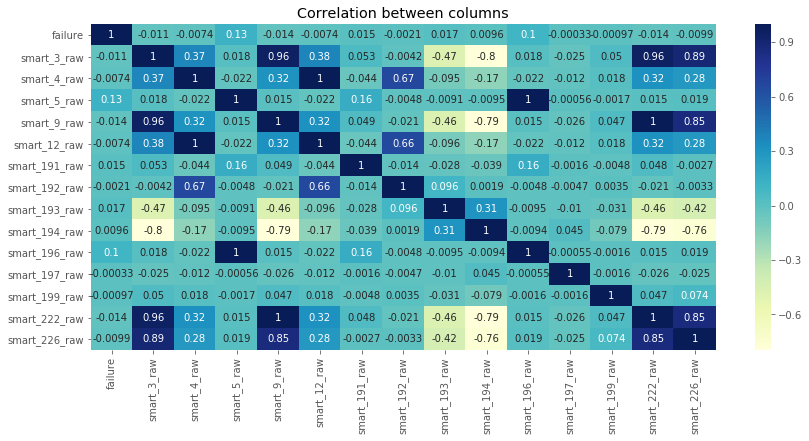

In [602]:
f,ax = plt.subplots(figsize=(14, 6))
ax = sns.heatmap(normalized_std.corr(), annot = True, cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation between columns")
plt.show()

### Dropping Columns with Correlation Greater than 90%

In [603]:
corr_matrix = normalized_std.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print("Droped Columns: {}".format(to_drop))

normalized_std = normalized_std.drop(normalized_std[to_drop], axis=1)
print(normalized_std.shape)
normalized_std.head()

Droped Columns: ['smart_9_raw', 'smart_12_raw', 'smart_196_raw', 'smart_222_raw']
(29837, 11)


,failure,smart_3_raw,smart_4_raw,smart_5_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_199_raw,smart_226_raw
0,0,0.746303,0.861549,-0.024258,-0.070105,0.472332,-0.435270,-0.101881,-0.023163,-0.068067,0.929982
1,0,1.223894,1.652948,-0.024258,-0.070095,-0.202215,-0.451523,-0.231550,-0.023163,-0.068067,1.555025
2,0,0.719899,0.465849,-0.024258,-0.070115,0.135059,-0.449049,-0.750224,-0.023163,-0.068067,1.183378
3,0,0.704612,-0.721250,-0.024258,-0.070139,-0.202215,-0.419723,-0.620556,-0.023163,-0.068067,0.980661
4,0,0.708318,0.861549,-0.024258,-0.070120,0.472332,-0.438803,-0.361218,-0.023163,-0.068067,0.963768


In [604]:
normalized_std.keys()

Index(['failure', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw'],
      dtype='object')

## Feature Selection Using Recursive Feature Selection (RFE) by SMOTE, StratifiedKFold, and Random Forest Classifier

In [605]:
X_Selected = normalized_std.drop(['failure'], axis = 1)
y_Selected = normalized_std['failure']

### Distribution of failed data

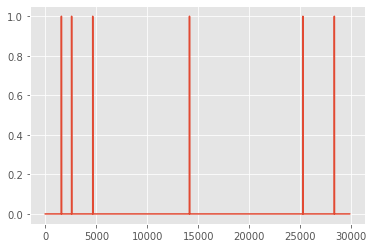

In [606]:
plt.plot(y_Selected)
plt.show()

In [607]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [608]:
# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
i=0

for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #---------------------------------------------
    #SMOTE
    sm = SMOTE(kind='regular',k_neighbors=2)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #----------------------------------------------
    #FRE
    model = RandomForestClassifier(max_depth=2, random_state=0) #n_estimators = 100
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)

    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    #---------------------------------------------
    model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    #cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))
    
    i = i+1
    print('Optimal number of featurres in fold', i ,':')
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of featurres in fold 1 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_191_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of featurres in fold 2 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of featurres in fold 3 :
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_193_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of featurres in fold 4 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of featurres in fold 5 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_193_raw', 'smart_226_raw']

Balanced Accuracy Score: [0.42349589408412935, 0.4555816292323165, 0.9783774723432785, 0.4585149178679182, 0.4544083137780758]
Balanced Accuracy Score Mean Value: 0.5540756454611437

F1_score: [0.45849587226707794, 0.47671665351223363, 0.4927959568271372, 0.4783178877426123, 0.4760734041619106]
F1_s

#### Ranking of Features

In [609]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] = ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw']
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
0,1.0,smart_3_raw
5,1.0,smart_193_raw
9,1.0,smart_226_raw
1,1.4,smart_4_raw
2,2.0,smart_5_raw
4,2.0,smart_192_raw
8,3.4,smart_199_raw
6,3.8,smart_194_raw
3,4.6,smart_191_raw
7,4.8,smart_197_raw


In [611]:
X_Selected = normalized_std.loc[:,['smart_3_raw', 'smart_193_raw', 'smart_226_raw', 'smart_4_raw', 'smart_5_raw']]
y_Selected = normalized_std['failure']

#### Based on the Recursive Feature Selection using the StratifiedKFold and Random Forest Classifier, we observe that the following are the top 5 - SMART features have more significance in predicting the failures of the hard-drives:

* 'smart_3_raw'
* 'smart_293_raw'
* 'smart_226_raw'
* 'smart_4_raw'
* 'smart_5_raw'

### Predictive Model Using SMOTE, StratifiedShuffleSplit and Random Forest Classifier 

In [612]:
#Dividing the data into response variable and attributes
X = np.array(X_Selected)
y = np.array(y_Selected)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (29837, 5)
Shape of y: (29837,)


In [613]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print('Number of StratifiedShuffleSplits:',sss.get_n_splits(X, y))

Number of StratifiedShuffleSplits: 5


In [614]:
def plot_cm(cnf_matrix, normalize=False):
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='g', cmap=plt.cm.Oranges)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - .5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 70.54289544235925%
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      8950
           1       0.00      1.00      0.00         2

    accuracy                           0.71      8952
   macro avg       0.50      0.85      0.41      8952
weighted avg       1.00      0.71      0.83      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 70.91152815013405%
      

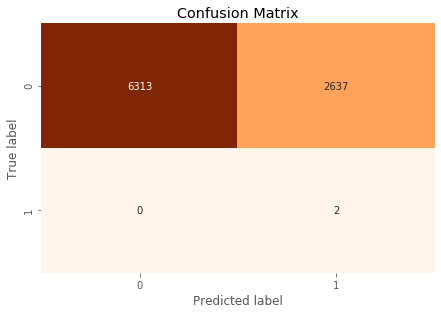

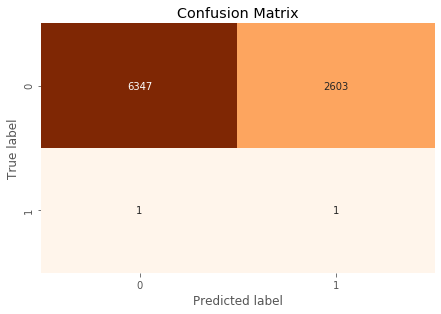

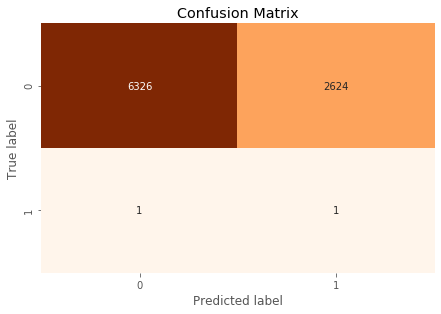

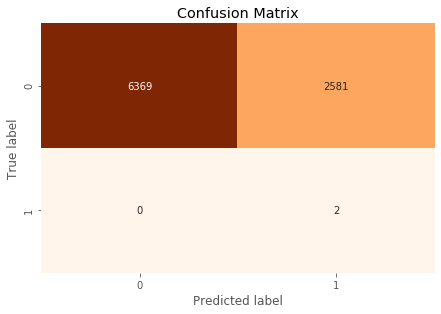

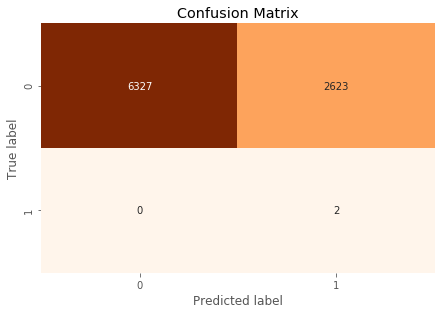

In [615]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(kind='regular',k_neighbors=2)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

### Literarture Predictive Model Using SMOTE, StratifiedShuffleSplit and Random Forest Classifier 

In [616]:
data.keys()

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw',
       'smart_5_raw', 'smart_7_raw', 'smart_8_raw', 'smart_9_raw',
       'smart_10_raw', 'smart_12_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_196_raw', 'smart_197_raw',
       'smart_198_raw', 'smart_199_raw', 'smart_220_raw', 'smart_222_raw',
       'smart_223_raw', 'smart_224_raw', 'smart_226_raw', 'smart_240_raw'],
      dtype='object')

#### According to the litrature, below are the following SMART features that were used to predict the hard-drive failures:

* 'smart_5_raw'
* 'smart_12_raw'
* 'smart_187_raw'
* 'smart_189_raw'
* 'smart_190_raw'
* 'smart_198_raw'
* 'smart_199_raw'
* 'smart_200_raw'

#### only 'smart_5_raw', 'smart_12_raw', 'smart_198_raw', 'smart_199_raw' exists in Toshiba dataset. 

In [617]:
scaler = preprocessing.StandardScaler().fit(un_normalized)
normalized_std2 =  pd.DataFrame(scaler.transform(un_normalized))
normalized_std2.columns = un_normalized.keys()
normalized_std2.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_220_raw,smart_222_raw,smart_223_raw,smart_224_raw,smart_226_raw,smart_240_raw
0,0.0,0.0,0.746303,0.861549,-0.024258,0.0,0.0,0.603327,0.0,0.867406,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.603637,0.0,0.0,0.929982,0.0
1,0.0,0.0,1.223894,1.652948,-0.024258,0.0,0.0,0.882785,0.0,1.662606,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.885288,0.0,0.0,1.555025,0.0
2,0.0,0.0,0.719899,0.465849,-0.024258,0.0,0.0,0.603618,0.0,0.469806,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.604219,0.0,0.0,1.183378,0.0
3,0.0,0.0,0.704612,-0.721250,-0.024258,0.0,0.0,0.610161,0.0,-0.722995,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.607714,0.0,0.0,0.980661,0.0
4,0.0,0.0,0.708318,0.861549,-0.024258,0.0,0.0,0.603472,0.0,0.867406,...,-0.023944,-0.023163,0.0,-0.068067,0.0,0.603782,0.0,0.0,0.963768,0.0


In [618]:
X_Selected = normalized_std2.loc[:,['smart_5_raw', 'smart_12_raw', 'smart_198_raw', 'smart_199_raw']]
y_Selected = normalized_std['failure']

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 70.54289544235925%
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      8950
           1       0.00      1.00      0.00         2

    accuracy                           0.71      8952
   macro avg       0.50      0.85      0.41      8952
weighted avg       1.00      0.71      0.83      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 70.91152815013405%
      

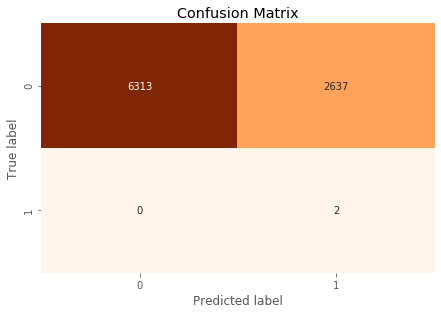

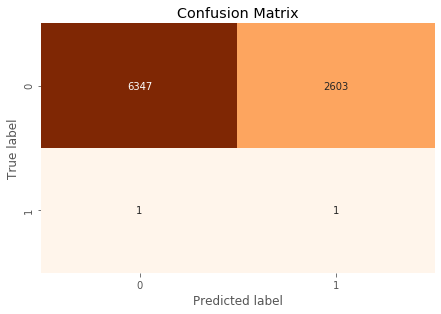

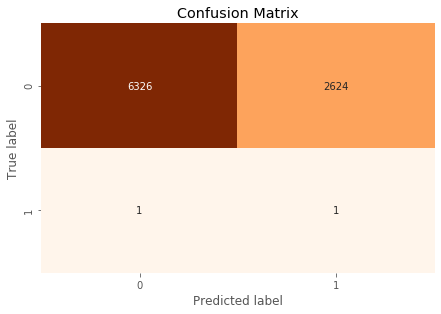

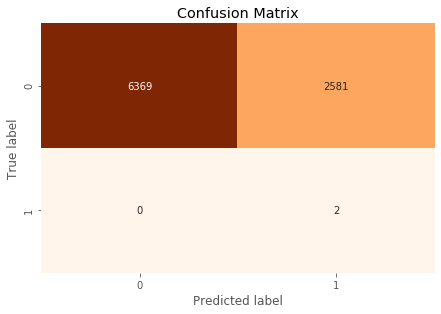

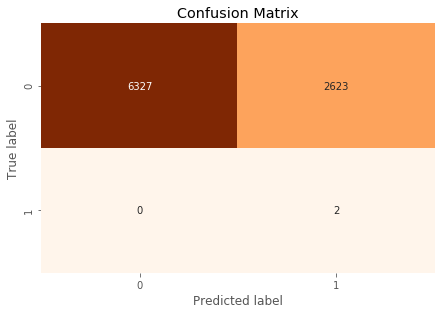

In [619]:
for train_index, test_index in sss.split(X_Selected, y_Selected):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(kind='regular',k_neighbors=2)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

## Feature Selection Using Recursive # Feature Selection (RFE) by ADASYN, StratifiedKFold, and Random Forest Classifier

In [550]:
def makeOverSamplesADASYN(X,y):
    resampling = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=2)
    X_res, y_res = resampling.fit_resample(X, y)
    return X_res,y_res

In [620]:
X_Selected = normalized_std.drop(['failure'], axis = 1)
y_Selected = normalized_std['failure']

# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
i=0
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #---------------------------------------------------------
    #ADASYN
    X_train_adasin, y_train_adasin= makeOverSamplesADASYN(X_train, y_train.ravel())
    #---------------------------------------------------------
    #create the RFE model and select 5 attributes
    model = RandomForestClassifier(max_depth=2, random_state=0) #n_estimators = 100
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_adasin, y_train_adasin.ravel())
    X_train_adasin = rfe.transform( X_train_adasin)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    #---------------------------------------------------------
    # create a base classifier used to evaluate a subset of attributes
    model.fit(X_train_adasin, y_train_adasin.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    #cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))

    i = i+1
    print('Optimal number of featurres in fold', i ,':')
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of featurres in fold 1 :
Selected features: ['smart_3_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of featurres in fold 2 :
Selected features: ['smart_4_raw', 'smart_5_raw', 'smart_193_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of featurres in fold 3 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_193_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of featurres in fold 4 :
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_193_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of featurres in fold 5 :
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_192_raw', 'smart_193_raw']

Balanced Accuracy Score: [0.4805597452656276, 0.39523969158565203, 0.4860878310425746, 0.9773717733825009, 0.9506369426751593]
Balanced Accuracy Score Mean Value: 0.6579791967903029

F1_score: [0.49000341763499655, 0.44144903117101936, 0.4929038837426702, 0.49210041159320866, 0.475728898298599

### Feature selection

In [622]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] = ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw']
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
5,1.0,smart_193_raw
9,1.2,smart_226_raw
0,1.8,smart_3_raw
6,1.8,smart_194_raw
1,2.0,smart_4_raw
4,2.0,smart_192_raw
2,2.8,smart_5_raw
8,3.0,smart_199_raw
7,4.0,smart_197_raw
3,5.4,smart_191_raw


In [623]:
X_Selected = normalized_std.loc[:,['smart_193_raw', 'smart_226_raw', 'smart_3_raw', 'smart_194_raw', 'smart_4_raw']]
y_Selected = normalized_std['failure']

### Predictive Model Using ADASYN, StratifiedShuffleSplit and RandomForestClassifier

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 95.05138516532618%
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      8950
           1       0.00      0.00      0.00         2

    accuracy                           0.95      8952
   macro avg       0.50      0.48      0.49      8952
weighted avg       1.00      0.95      0.97      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 90.01340482573727%
      

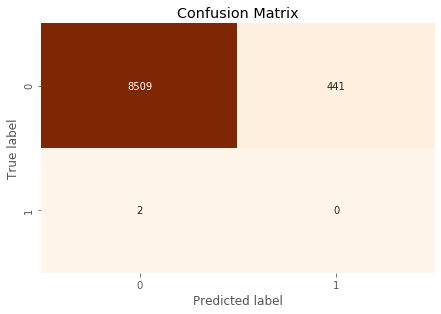

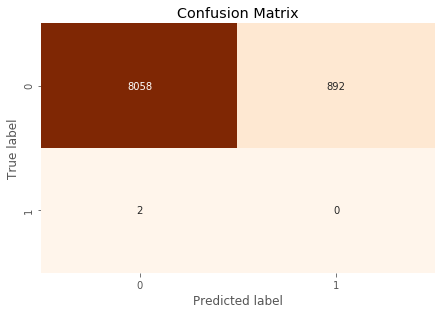

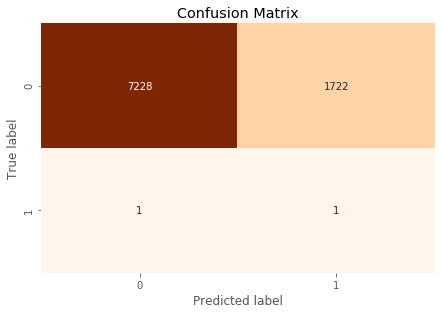

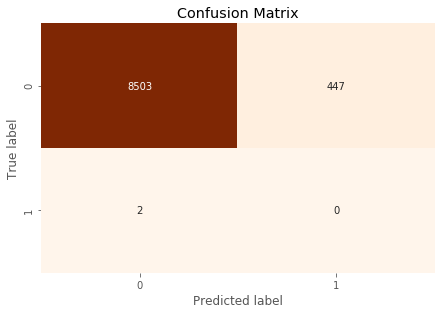

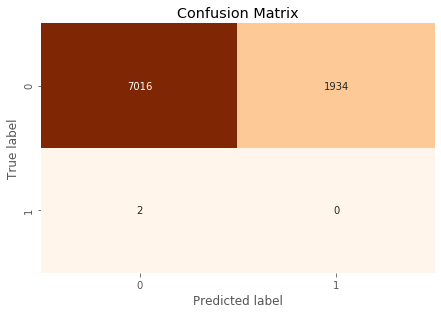

In [624]:
for train_index, test_index in sss.split(X_Selected, y_Selected):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    #ADASYN
    X_ads, y_ads= makeOverSamplesADASYN(X_train, y_train.ravel())
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_ads, y_ads)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Feature Selection Using Recursive Feature Selection (RFE) by SMOTE, StratifiedKFold, and DecisionTreeClassifier

In [625]:
X_Selected = normalized_std.drop(['failure'], axis = 1)
y_Selected = normalized_std['failure']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
F1_acc = []
bacc = []
votes = []
accs = []
support = []
i = 0
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #--------------------------------------------------
    #SMOTE
    sm = SMOTE(kind='regular',k_neighbors=2)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #---------------------------------------------------
    model = DecisionTreeClassifier()  
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    #-----------------------------------------------------
    # create a base classifier used to evaluate a subset of attributes
    a = model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))
    
    i = i+1
    print('Optimal number of features in fold' , i)
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of features in fold 1
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw']
Optimal number of features in fold 2
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold 3
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold 4
Selected features: ['smart_4_raw', 'smart_5_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold 5
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_193_raw', 'smart_194_raw']

Balanced Accuracy Score: [0.5, 0.49974857525980554, 0.49974857525980554, 0.5, 0.499832383506537]
Balanced Accuracy Score Mean Value: 0.49986590680522963

F1_score: [0.9998324396782842, 0.4998323554065382, 0.4998323554065382, 0.9999161987765022, 0.4998742770932864]
F1_score Mean Value: 0.6998575252722298

Accur

### Feature selection

In [626]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] = ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw']
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
1,1.0,smart_4_raw
5,1.0,smart_193_raw
0,1.2,smart_3_raw
4,1.2,smart_192_raw
9,1.6,smart_226_raw
6,1.8,smart_194_raw
2,2.6,smart_5_raw
3,4.0,smart_191_raw
8,4.8,smart_199_raw
7,5.8,smart_197_raw


In [627]:
#X_Selected = normalized_std.loc[:,['smart_3_raw', 'smart_193_raw', 'smart_9_raw', 'smart_194_raw', 'smart_222_raw']]
X_Selected = normalized_std.loc[:,['smart_4_raw', 'smart_193_raw', 'smart_3_raw', 'smart_192_raw', 'smart_226_raw']]
y_Selected = normalized_std['failure']

## Predictive Model Using SMOTE, StratifiedShuffleSplit and DecisionTreeClassifier

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 99.97765862377122%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       0.00      0.00      0.00         2

    accuracy                           1.00      8952
   macro avg       0.50      0.50      0.50      8952
weighted avg       1.00      1.00      1.00      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})


C:\Users\areihani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       1.00      1.00      1.00         2

    accuracy                           1.00      8952
   macro avg       1.00      1.00      1.00      8952
weighted avg       1.00      1.00      1.00      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [26845  3045 29701 ... 14309 27554 23146] TEST: [21608 16392 17648 ... 10778 13840 29713]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 99.98882931188561%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       1.00      0.50      0.67         2

    accuracy                         

C:\Users\areihani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 99.98882931188561%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       1.00      0.50      0.67         2

    accuracy                           1.00      8952
   macro avg       1.00      0.75      0.83      8952
weighted avg       1.00      1.00      1.00      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


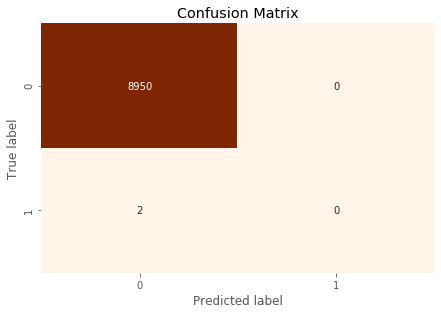

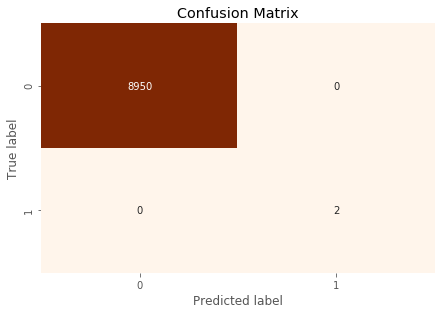

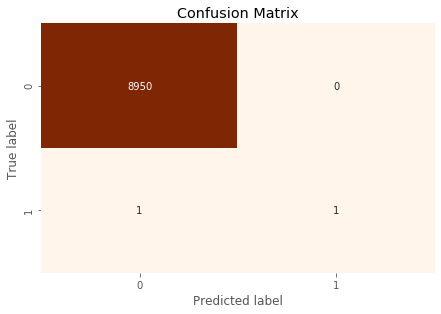

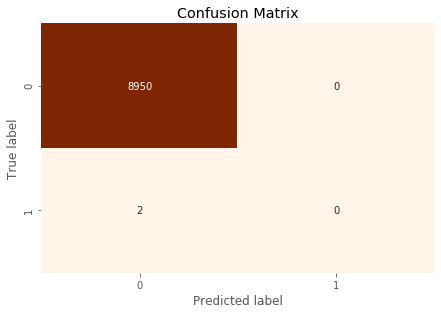

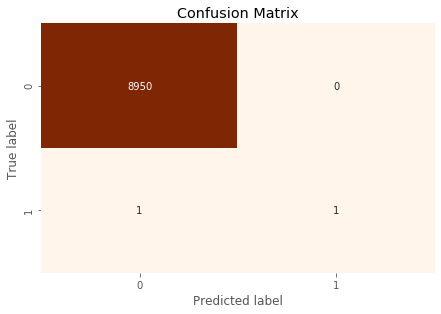

In [628]:
for train_index, test_index in sss.split(X_Selected, y_Selected):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(kind='regular',k_neighbors=2)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = DecisionTreeClassifier()  
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

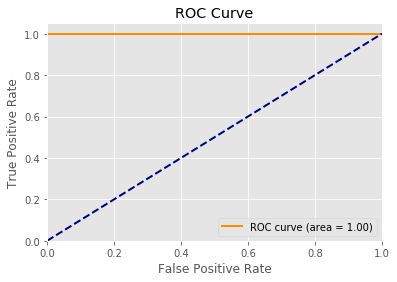

In [629]:
plt.style.use('ggplot')

y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Selection Using Recursive # Feature Selection (RFE) by ADASYN, StratifiedKFold, and DecisionTreeClassifier

In [630]:
X_Selected = normalized_std.drop(['failure'], axis = 1)
y_Selected = normalized_std['failure']
# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
i=0
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #-----------------------------------------------------
    #ADASYN
    X_train_ads, y_train_ads= makeOverSamplesADASYN(X_train, y_train.ravel())
    #-----------------------------------------------------
    model = DecisionTreeClassifier()  
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_ads, y_train_ads.ravel())
    X_train_ads = rfe.transform( X_train_ads)
    xTest = rfe.transform(xTest)
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    
    #----------------------------------------------------
    model.fit(X_train_ads, y_train_ads.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))

    i = i+1
    print('Optimal number of features in fold:' , i )
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of features in fold: 1
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_194_raw', 'smart_226_raw']
Optimal number of features in fold: 2
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold: 3
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold: 4
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_192_raw', 'smart_193_raw', 'smart_226_raw']
Optimal number of features in fold: 5
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_192_raw', 'smart_193_raw']

Balanced Accuracy Score: [0.47561588738059324, 0.4702480724103252, 0.46521957760643645, 0.4642976868923902, 0.9971505196111297]
Balanced Accuracy Score Mean Value: 0.5745063487801749

F1_score: [0.48741949334478313, 0.4846260148557609, 0.48194130925507894, 0.48144607630138175, 0.5263489662128089]
F1_score M

### Feature ranking

In [631]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] =  ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw']

rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
0,1.0,smart_3_raw
1,1.0,smart_4_raw
5,1.2,smart_193_raw
9,1.4,smart_226_raw
4,1.8,smart_192_raw
2,2.4,smart_5_raw
6,2.4,smart_194_raw
3,3.4,smart_191_raw
8,4.6,smart_199_raw
7,5.8,smart_197_raw


In [639]:
X_Selected = normalized_std.loc[:,['smart_3_raw', 'smart_4_raw', 'smart_226_raw', 'smart_192_raw', 'smart_193_raw']]
y_Selected = normalized_std['failure']

### Predictive Model Using ADASYN, StratifiedShuffleSplit and DecisionTreeClassifier

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 20881, 1: 20880})

Decision Tree Classifier
classifier_accuracy = 99.96648793565683%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       0.00      0.00      0.00         2

    accuracy                           1.00      8952
   macro avg       0.50      0.50      0.50      8952
weighted avg       1.00      1.00      1.00      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({1: 20882, 0: 20881})

Decision Tree Classifier
classifier_accuracy = 99.96648793565683%
      

C:\Users\areihani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Resampled dataset shape Counter({1: 20882, 0: 20881})

Decision Tree Classifier
classifier_accuracy = 99.97765862377122%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8950
           1       0.00      0.00      0.00         2

    accuracy                           1.00      8952
   macro avg       0.50      0.50      0.50      8952
weighted avg       1.00      1.00      1.00      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


C:\Users\areihani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


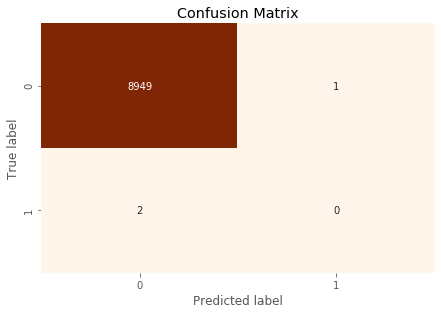

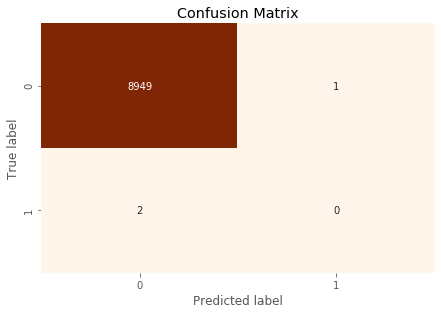

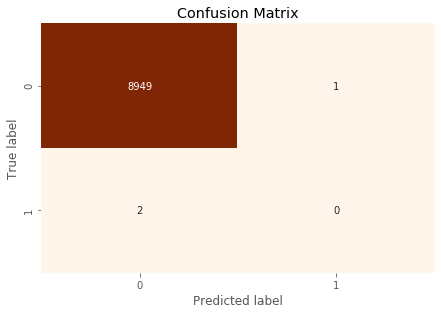

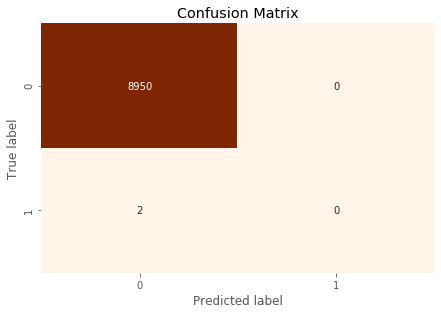

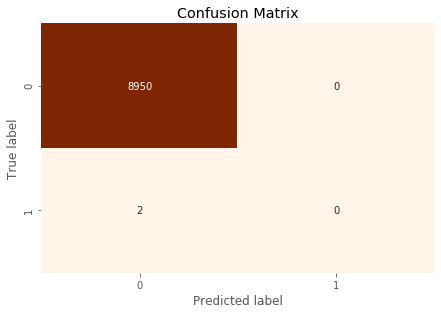

In [640]:
for train_index, test_index in sss.split(X_Selected, y_Selected):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    #smt = SMOTE(kind='regular',k_neighbors=2)
    X_ads, y_ads = makeOverSamplesADASYN(X_train, y_train.ravel()) #smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_ads))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = DecisionTreeClassifier()  
    classifier.fit(X_ads, y_ads)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Feature Selection Using Recursive # Feature Selection (RFE) by SMOTE, StratifiedKFold, and LogisticRegression

In [634]:
X_Selected = normalized_std.drop(['failure'], axis = 1)
y_Selected = normalized_std['failure']

# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
i=0
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #---------------------------------------------
    #SMOTE
    sm = SMOTE(kind='regular',k_neighbors=2)# SMOTE(random_state=12)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #----------------------------------------------
    model = LogisticRegression(solver="liblinear", multi_class="auto")
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    #--------------------------------------------
    a = model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))
    
    i = i+1
    print('Optimal number of features:', i )
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of features: 1
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw', 'smart_199_raw']
Optimal number of features: 2
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw', 'smart_226_raw']
Optimal number of features: 3
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw', 'smart_226_raw']
Optimal number of features: 4
Selected features: ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw']
Optimal number of features: 5
Selected features: ['smart_3_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw', 'smart_226_raw']

Balanced Accuracy Score: [0.8319926261102732, 0.881746563861884, 0.4026986255447536, 0.3888702648340597, 0.8520784445189407]
Balanced Accuracy Score Mean Value: 0.6714773049739822

F1_score: [0.4000286554196317, 0.4336513506199612, 0.4460638692907538, 0.43744696898274726, 0.4137654981837273]
F1_score Mean Value: 0.4261912684993643

Accuracy: [0

### Feature ranking:

In [635]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] =  ['smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_191_raw',
       'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_226_raw']
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
0,1.0,smart_3_raw
2,1.0,smart_5_raw
3,1.0,smart_191_raw
4,1.0,smart_192_raw
9,1.6,smart_226_raw
1,2.4,smart_4_raw
8,3.4,smart_199_raw
5,3.8,smart_193_raw
6,4.4,smart_194_raw
7,5.4,smart_197_raw


In [636]:
X_Selected = normalized_std.loc[:,['smart_3_raw', 'smart_5_raw', 'smart_191_raw', 'smart_192_raw', 'smart_226_raw']]
y_Selected = normalized_std['failure']

### Predictive Model Using SMOTE, StratifiedShuffleSplit and LogisticRegression

TRAIN: [ 6247  6946  3275 ... 25282  3583 15419] TEST: [27757 17348 23710 ... 13657 17329 10508]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 78.51876675603218%
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      8950
           1       0.00      1.00      0.00         2

    accuracy                           0.79      8952
   macro avg       0.50      0.89      0.44      8952
weighted avg       1.00      0.79      0.88      8952


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [19516 27850 10333 ... 26728 26525 28225] TEST: [ 7317 26863 12583 ... 10988 14795 28536]
Test_set '1': 2
Test_set '0': 8950 

Original dataset shape Counter({0: 29831, 1: 6})
Resampled dataset shape Counter({0: 29831, 1: 29831})

Decision Tree Classifier
classifier_accuracy = 78.3958891867739%
       

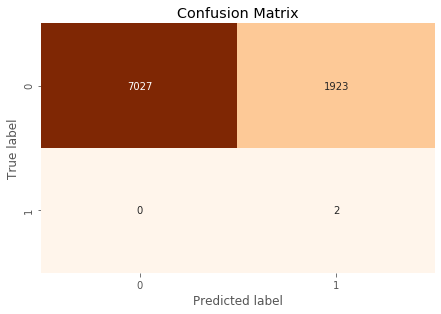

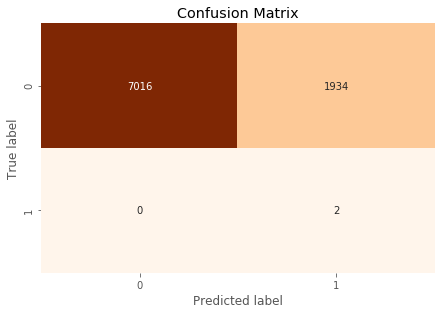

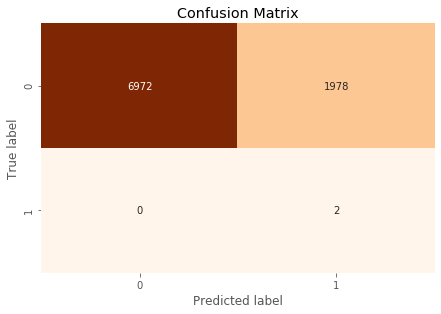

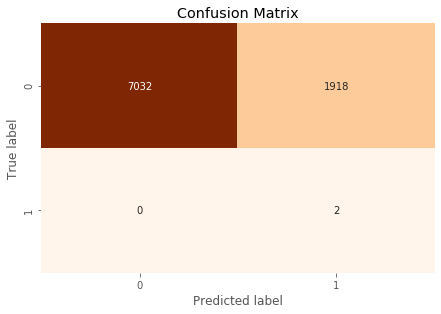

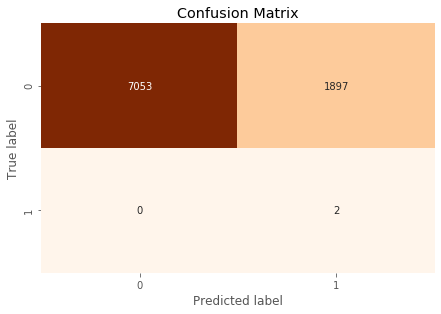

In [637]:
for train_index, test_index in sss.split(X_Selected, y_Selected):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(kind='regular',k_neighbors=2)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = LogisticRegression(solver="liblinear", multi_class="auto")
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_cm(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

### ROC

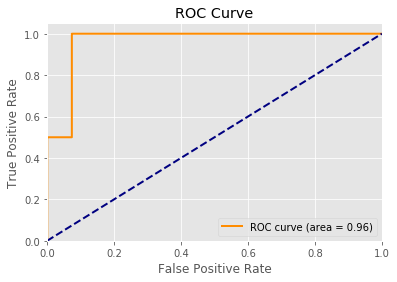

In [638]:
plt.style.use('ggplot')
y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Results

* Initially Tishiba harddrive dataset had the dimention of (33703*30), after dropping null values (we choose this approach because number of null values was relativaly small). Based on data description, we further dropped features that was all zeros. 

* Two methods of normalization applied on the dataset: StandardScaler and MinMaxScaler. Based on the result StandardScaler worked better in predicting the failed drives.

* There are totally 6 failed hard drive in this dataset, this shows that the datased is highly implanced. To solve the issue two methods of resampling techniques applied on the dataset inside the kfold crossvalidation: ADASYN and SMOTE.

* Recursive feature selection used to select top 5 features.

* Four different classifiers, namely RandomForest, DecisionTree, SVM, and LogisticRegression are applied to predict the hard drive failures. However, SVM did not work, we had to terminate the running after a few hours.

Based on the results: 
* RandomeForest Classifier with SMOTE resampling technique selected the following 5 features: ['smart_3_raw', 'smart_193_raw', 'smart_226_raw', 'smart_4_raw', 'smart_5_raw'] with the accuracy of 70%.
* RandomeForest Classifier with ADASYN resampling technique selected the following 5 features: ['smart_193_raw', 'smart_226_raw', 'smart_3_raw', 'smart_194_raw', 'smart_4_raw'] with the accuracy of 78%.
* DecisionTree Classifier with SMOTE resampling technique selected the following 5 features: ['smart_4_raw', 'smart_193_raw', 'smart_3_raw', 'smart_192_raw', 'smart_226_raw'] with the accuracy of 99%.
* DecisionTree Classifier with ADASYN resampling technique selected the following 5 features: ['smart_3_raw', 'smart_4_raw', 'smart_226_raw', 'smart_199_raw', 'smart_193_raw'] with the accuracy of 99%.
* Logistic Reression with SMOTE resampling technique selected the following 5 features: ['smart_3_raw', 'smart_5_raw', 'smart_226_raw', 'smart_191_raw', 'smart_192_raw'] with the accuracy of 78%.

* Based on the result that We got from confusion matrix and also considering the accuracy, we conclude that for Toshiba dataset due to being too sparce, Logistic regression with SMOTE resamplng worked the best. Because it detected both of the failed hard drives in the test data and compared to other Random Forest classifier number of false alarms was less.